# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [5]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interps

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [6]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

### Random pattern

In [7]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())

We can easily visualize the rendered datasets because they are generated in two dimensions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


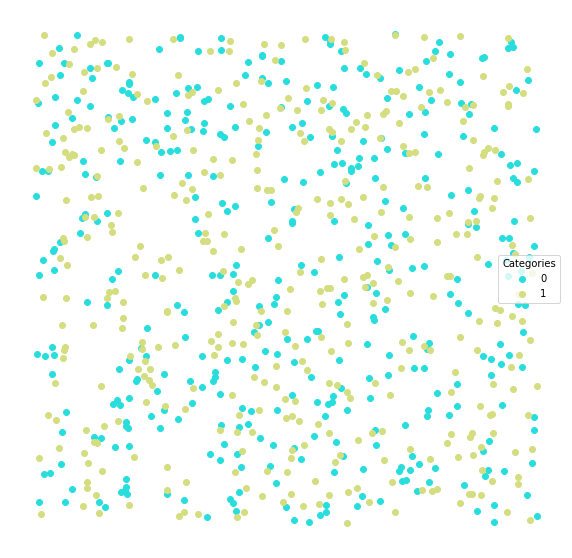

In [8]:
lucem_illud_2020.plotter(dfTrain)

### andSplit pattern

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


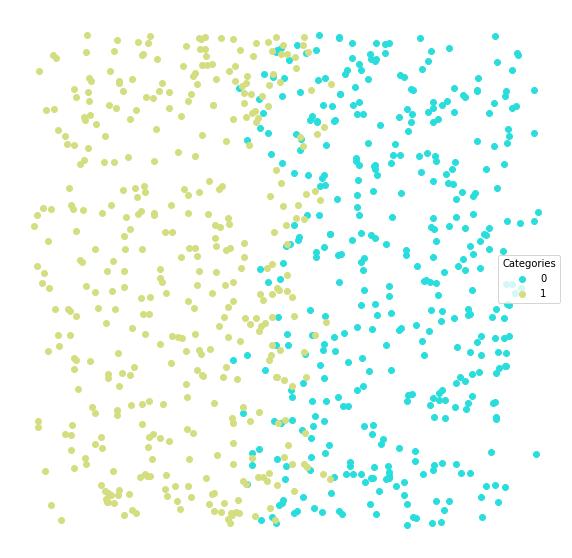

In [9]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
lucem_illud_2020.plotter(dfTrain)

### XorSplit pattern

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


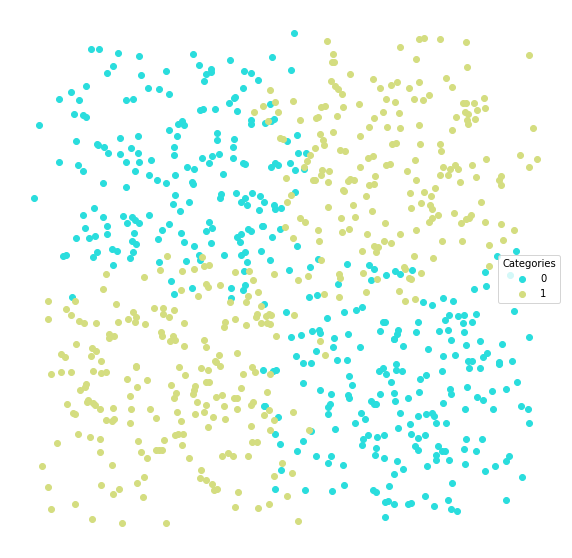

In [10]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))
lucem_illud_2020.plotter(dfTrain)

### targetSplit pattern

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


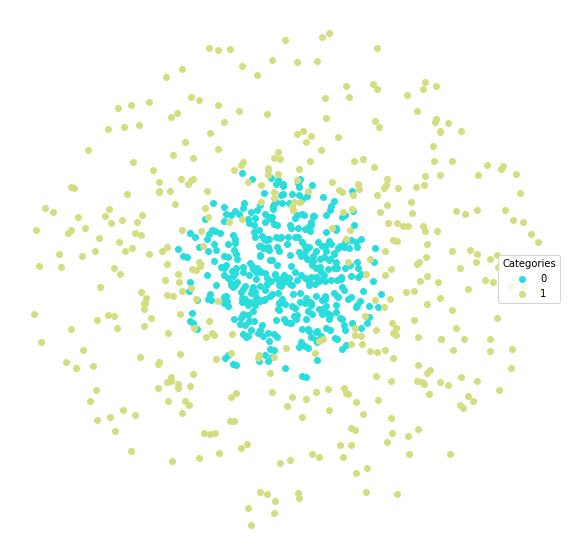

In [11]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
lucem_illud_2020.plotter(dfTrain)

### multiBlobs pattern

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

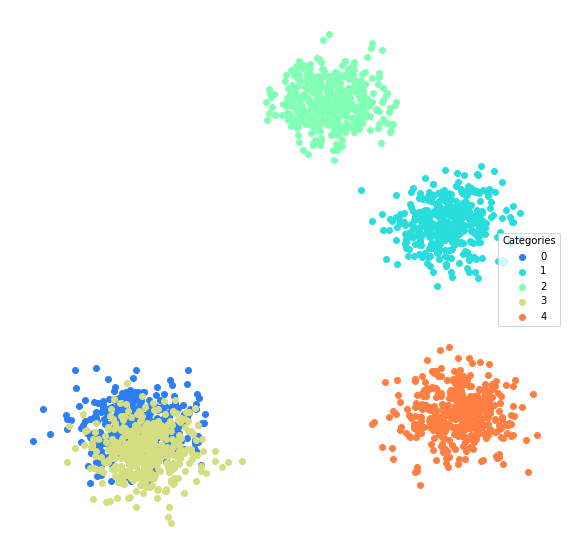

In [12]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [ ]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

### Bayes Model

In [14]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

### Analogizes model

In [18]:
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

### Classic Regression model

In [16]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Symbolists model

In [17]:
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now we fit the model by giving it our training data

In [21]:
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Connectionists model

In [22]:
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Ensemble model

In [23]:
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [24]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.14,0.806157,0.616071,0.496801,0.718750
1,0.00,1.000000,1.000000,1.000000,1.000000
2,0.00,1.000000,1.000000,1.000000,1.000000
3,0.14,0.755296,0.686047,0.482831,0.578431
4,0.00,1.000000,1.000000,1.000000,1.000000


This lets us look at which classes do better:

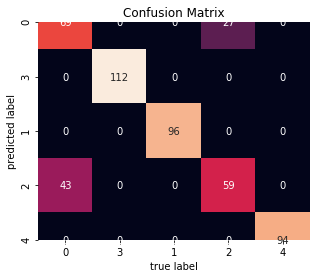

In [25]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

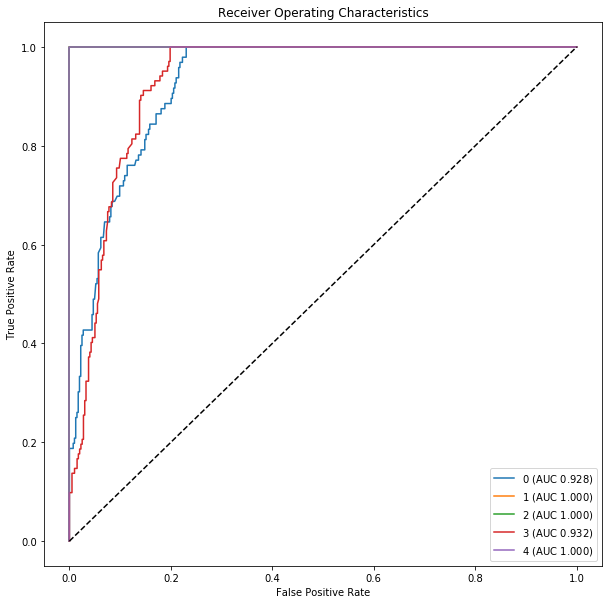

In [26]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

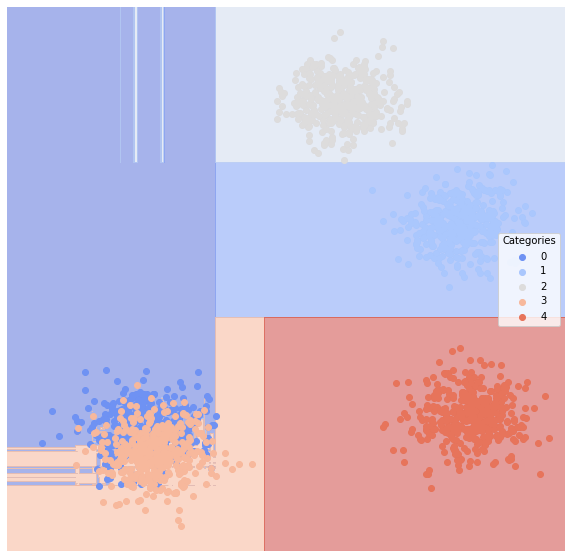

In [27]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [28]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [29]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [30]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.184953,0.689083,0.878049,0.520499,0.400000
Bad Roommates,0.141066,0.818804,0.662500,0.550969,0.746479
Weeaboo Tales,0.191223,0.856102,0.564885,0.548456,0.948718
Tales From Tech Support,0.053292,0.902066,0.970149,0.835268,0.812500


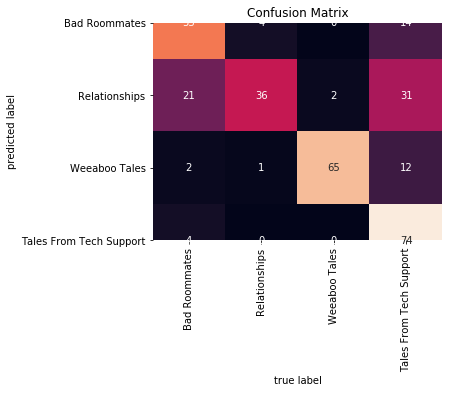

In [32]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

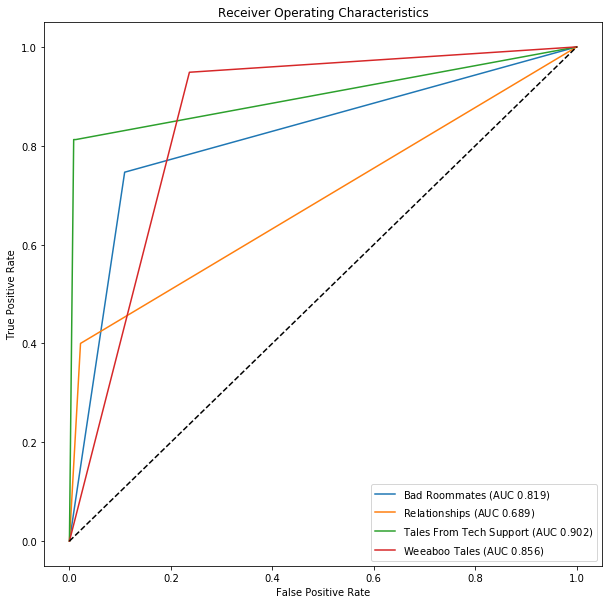

In [33]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

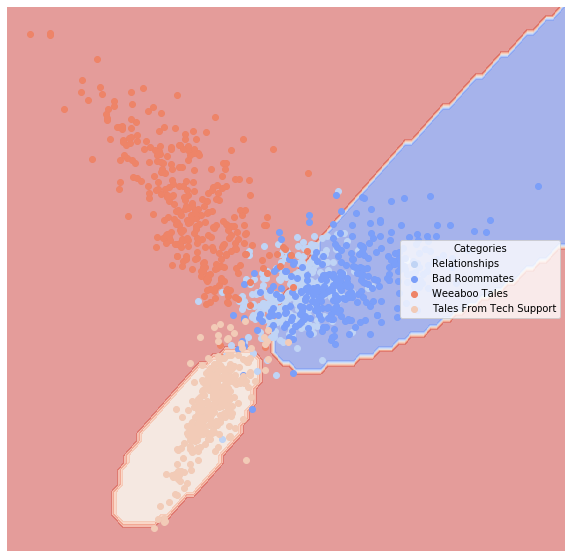

In [34]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

### 1. Artificial Datasets

#### 1) Setting noise = 0.5

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


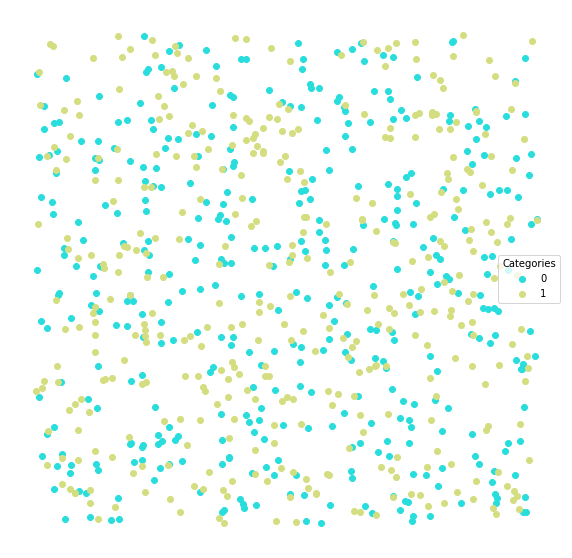

In [128]:
noise_1 = .5
#a. Let variables be randomly distributed (which actually has nothing to do with noise)
dfTrain_ran1, dfTest_ran1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
lucem_illud_2020.plotter(dfTrain_ran1)

In [129]:
#Bayes
clf_bayes_ran1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_bayes_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.55,0.469691,0.451807,0.455484,0.797872
1,0.55,0.469691,0.441176,0.517431,0.141509


In [131]:
#Analogizes 1
clf_ana1_ran1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_ana1_ran1, dfTest_ran1)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.53,0.5,0.47,0.47,1.0
1,0.53,0.5,0.00,0.53,0.0


In [132]:
#Analogizes 2
clf_ana2_ran1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_ana2_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.52,0.491971,0.464286,0.466049,0.691489
1,0.52,0.491971,0.516667,0.526101,0.292453


In [133]:
#Analogizes 3
clf_ana3_ran1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_ana3_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.455,0.549077,0.513274,0.496701,0.617021
1,0.455,0.549077,0.586207,0.557043,0.481132


In [134]:
#Classical Regression
clf_reg_ran1 = sklearn.linear_model.LogisticRegression()
clf_reg_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_reg_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.53,0.490365,0.464286,0.465258,0.829787
1,0.53,0.490365,0.500000,0.525472,0.150943


In [135]:
#Symbolists 1
clf_sy1_ran1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.48,0.521277,0.490385,0.481060,0.542553
1,0.48,0.521277,0.552083,0.541042,0.500000


In [136]:
#Symbolists 2
clf_sy2_ran1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.44,0.566238,0.5250,0.506862,0.670213
1,0.44,0.566238,0.6125,0.568137,0.462264


In [137]:
#Connectionists
clf_con_ran1 = sklearn.neural_network.MLPClassifier()
clf_con_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_con_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.565,0.44711,0.432624,0.445745,0.648936
1,0.565,0.44711,0.440678,0.508091,0.245283


In [138]:
#Ensemble
clf_en_ran1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_ran1.fit(np.stack(dfTrain_ran1['vect'], axis=0), dfTrain_ran1['category'])
lucem_illud_2020.evaluateClassifier(clf_en_ran1, dfTest_ran1)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.51,0.491168,0.461538,0.465679,0.510638
1,0.51,0.491168,0.520833,0.525676,0.471698


**Summary for randomly distributed data** <br>
For randomly distributed dataset, it seems that Random Forests method has the best estimates with the least error rates. Maybe it is because that random sample have no pattern in it, and every method that trys to find relationships between these data will have overfitting problems

In [174]:
#b. andSplit method for noise = 0.5
and1_df = pd.DataFrame()
dfTrain_and1, dfTest_and1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise_1))
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_and1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_and1, dfTest_and1)["Error_Rate"]
and1_df = pd.DataFrame(error_bayes)
and1_df = and1_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

In [175]:
#Analogizes 1
clf_ana1_and1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_and1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_and1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_and1 = sklearn.linear_model.LogisticRegression()
clf_reg_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_and1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_and1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_and1 = sklearn.neural_network.MLPClassifier()
clf_con_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_and1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(8, "Error_Rate: En", error_en.values)

In [176]:
and1_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.255,0.24,0.23,0.275,0.255,0.275,0.24,0.24,0.23
1,0.255,0.24,0.23,0.275,0.255,0.275,0.24,0.24,0.23


**Summary for andSplit method at noise = 0.5** <br>
If the data is in andSplit pattern, and if we evaluate the esitimates in terms of error rates, we can see that Ensemble method and SVC method have the least errors. The results is quite insteresting since I though classic logistic regression model would be best fit for this kind of data. It may be because the noise that we need to use more complex models in this case. 

In [177]:
#c. XorSplit method for noise = 0.5
or1_df = pd.DataFrame()
dfTrain_or1, dfTest_or1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise_1))
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_or1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_or1, dfTest_or1)["Error_Rate"]
or1_df = pd.DataFrame(error_bayes)
or1_df = or1_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_or1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_or1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_or1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_or1 = sklearn.linear_model.LogisticRegression()
clf_reg_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_or1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_or1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_or1 = sklearn.neural_network.MLPClassifier()
clf_con_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_or1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(8, "Error_Rate: En", error_en.values)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [178]:
or1_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.37,0.365,0.29,0.23,0.365,0.245,0.24,0.215,0.195
1,0.37,0.365,0.29,0.23,0.365,0.245,0.24,0.215,0.195


**Summary for XorSplit method at noise = 0.5** <br>
If the data is in XorSplit pattern, and if we evaluate the esitimates in terms of error rates, we can see that Ensemble method has the lowest error rates. 

In [180]:
#d. targetSplit method for noise = 0.5
tar1_df = pd.DataFrame()
dfTrain_tar1, dfTest_tar1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise_1))
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_tar1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_tar1, dfTest_tar1)["Error_Rate"]
tar1_df = pd.DataFrame(error_bayes)
tar1_df = tar1_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_tar1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_tar1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_tar1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_tar1 = sklearn.linear_model.LogisticRegression()
clf_reg_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_tar1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_tar1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_tar1 = sklearn.neural_network.MLPClassifier()
clf_con_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_tar1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(8, "Error_Rate: En", error_en.values)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [181]:
tar1_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.295,0.485,0.455,0.345,0.55,0.37,0.295,0.28,0.3
1,0.295,0.485,0.455,0.345,0.55,0.37,0.295,0.28,0.3


**Summary for targetSplit method at noise = 0.5** <br>
If the data is in XorSplit pattern, and if we evaluate the esitimates in terms of error rates, we can see that Neural Network method has the lowest error rates. The reason why neural network is the best may due to the fact that one category is nested in another so it cannot be represented by a proper function. 

In [197]:
#e. multiBlobs method for noise = 0.5
blob1_df = pd.DataFrame()
dfTrain_blob, dfTest_blob = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise_1))
#Bayes
clf_bayes_blob = sklearn.naive_bayes.GaussianNB()
clf_bayes_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_blob, dfTest_blob)["Error_Rate"]
blob_df = pd.DataFrame(error_bayes)
blob_df = blob_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_blob = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_blob = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_blob = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_blob = sklearn.linear_model.LogisticRegression()
clf_reg_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_blob = sklearn.tree.DecisionTreeClassifier()
clf_sy1_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_blob = sklearn.ensemble.RandomForestClassifier()
clf_sy2_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_blob = sklearn.neural_network.MLPClassifier()
clf_con_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_blob = sklearn.ensemble.GradientBoostingClassifier()
clf_en_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(8, "Error_Rate: En", error_en.values)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [183]:
blob_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.006,0.008,0.006,0.006,0.008,0.008,0.008,0.008,0.006
1,0.018,0.018,0.074,0.012,0.018,0.024,0.012,0.018,0.016
2,0.056,0.054,0.112,0.050,0.054,0.064,0.048,0.054,0.058
3,0.002,0.002,0.012,0.000,0.002,0.004,0.000,0.002,0.006
4,0.046,0.046,0.044,0.044,0.046,0.052,0.044,0.046,0.046


**Summary for MultiBlob method at noise = 0.5** <br>
If the data is in MultiBlob pattern, and if we evaluate the esitimates in terms of error rates, we can see that KNN method has the lowest error rates. The reason why KNN is the best may be because the elements in each category are clustered together in MultiBlob pattern. Therefore, it is more efficient to use K-nearest neighbors in this case since it analyze data points from nearest neighbors in the training set. 

#### 2) Setting noise = 0.7

In [185]:
noise_2 = .7
#a. random method for noise = 0.7
ran_df = pd.DataFrame()
dfTrain_ran, dfTest_ran = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_ran = sklearn.naive_bayes.GaussianNB()
clf_bayes_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_ran, dfTest_ran)["Error_Rate"]
ran_df = pd.DataFrame(error_bayes)
ran_df = ran_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_ran = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_ran = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_ran = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_ran = sklearn.linear_model.LogisticRegression()
clf_reg_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_ran = sklearn.tree.DecisionTreeClassifier()
clf_sy1_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_ran = sklearn.ensemble.RandomForestClassifier()
clf_sy2_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_ran = sklearn.neural_network.MLPClassifier()
clf_con_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_ran = sklearn.ensemble.GradientBoostingClassifier()
clf_en_ran.fit(np.stack(dfTrain_ran['vect'], axis=0), dfTrain_ran['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_ran, dfTest_ran)["Error_Rate"]
ran_df.insert(8, "Error_Rate: En", error_en.values)

In [186]:
ran_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.565,0.575,0.57,0.515,0.57,0.55,0.495,0.56,0.505
1,0.565,0.575,0.57,0.515,0.57,0.55,0.495,0.56,0.505


**Summary for randomly distributed data** <br>
Similar as before, for randomly distributed dataset, it seems that Random Forests method has the best estimates with the least error rates. Maybe it is because that random sample have no pattern in it, and every method that trys to find relationships between these data will have overfitting problems

In [187]:
#b. andSplit method for noise = 0.7
and1_df = pd.DataFrame()
dfTrain_and1, dfTest_and1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise_2))
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_and1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_and1, dfTest_and1)["Error_Rate"]
and1_df = pd.DataFrame(error_bayes)
and1_df = and1_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_and1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_and1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_and1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_and1 = sklearn.linear_model.LogisticRegression()
clf_reg_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_and1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_and1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_and1 = sklearn.neural_network.MLPClassifier()
clf_con_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_and1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_and1.fit(np.stack(dfTrain_and1['vect'], axis=0), dfTrain_and1['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_and1, dfTest_and1)["Error_Rate"]
and1_df.insert(8, "Error_Rate: En", error_en.values)

In [188]:
and1_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.385,0.39,0.395,0.44,0.39,0.46,0.42,0.38,0.395
1,0.385,0.39,0.395,0.44,0.39,0.46,0.42,0.38,0.395


**Summary for andSplit method at noise = 0.7** <br>
If the data is in andSplit pattern, and if we evaluate the esitimates in terms of error rates, unlike former results (with noise = 0.5), Neural Network method has the smallest error rates. And generally speaking, the errors rates get larger when noise gets larger. 

In [189]:
#c. XorSplit method for noise = 0.7
or1_df = pd.DataFrame()
dfTrain_or1, dfTest_or1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise_2))
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_or1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_or1, dfTest_or1)["Error_Rate"]
or1_df = pd.DataFrame(error_bayes)
or1_df = or1_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_or1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_or1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_or1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_or1 = sklearn.linear_model.LogisticRegression()
clf_reg_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_or1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_or1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_or1 = sklearn.neural_network.MLPClassifier()
clf_con_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_or1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_or1.fit(np.stack(dfTrain_or1['vect'], axis=0), dfTrain_or1['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_or1, dfTest_or1)["Error_Rate"]
or1_df.insert(8, "Error_Rate: En", error_en.values)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [190]:
or1_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.46,0.49,0.32,0.275,0.5,0.335,0.25,0.215,0.27
1,0.46,0.49,0.32,0.275,0.5,0.335,0.25,0.215,0.27


**Summary for XorSplit method at noise = 0.7** <br>
If the data is in XorSplit pattern, and if we evaluate the esitimates in terms of error rates, we can see that Neural Network method has the lowest error rates. Unlike the error rates obtained when noise = 0.5, we can see that ensemble method does not have the best estimation now. 

In [193]:
#d. targetSplit method for noise = 0.7
tar1_df = pd.DataFrame()
dfTrain_tar1, dfTest_tar1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise_2))
#And for simplicity, I shall evaluate the accuracy of the following methods based on error rates
#Bayes
clf_bayes_tar1 = sklearn.naive_bayes.GaussianNB()
clf_bayes_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_tar1, dfTest_tar1)["Error_Rate"]
tar1_df = pd.DataFrame(error_bayes)
tar1_df = tar1_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_tar1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_tar1 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_tar1 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_tar1 = sklearn.linear_model.LogisticRegression()
clf_reg_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_tar1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_tar1 = sklearn.ensemble.RandomForestClassifier()
clf_sy2_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_tar1 = sklearn.neural_network.MLPClassifier()
clf_con_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_tar1 = sklearn.ensemble.GradientBoostingClassifier()
clf_en_tar1.fit(np.stack(dfTrain_tar1['vect'], axis=0), dfTrain_tar1['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_tar1, dfTest_tar1)["Error_Rate"]
tar1_df.insert(8, "Error_Rate: En", error_en.values)

In [195]:
tar1_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.345,0.42,0.42,0.38,0.48,0.395,0.345,0.38,0.35
1,0.345,0.42,0.42,0.38,0.48,0.395,0.345,0.38,0.35


**Summary for targetSplit method at noise = 0.7** <br>
If the data is in XorSplit pattern, and if we evaluate the esitimates in terms of error rates, we can see that Naive Bayes method and Random Forest method has the lowest error rates.  

In [199]:
#e. multiBlobs method for noise = 0.7
blob1_df = pd.DataFrame()
dfTrain_blob, dfTest_blob = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise_2))
#Bayes
clf_bayes_blob = sklearn.naive_bayes.GaussianNB()
clf_bayes_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_bayes = lucem_illud_2020.evaluateClassifier(clf_bayes_blob, dfTest_blob)["Error_Rate"]
blob_df = pd.DataFrame(error_bayes)
blob_df = blob_df.rename(columns={'Error_Rate': 'Error_Rate: Bayes'},)

#Analogizes 1
clf_ana1_blob = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_ana1 = lucem_illud_2020.evaluateClassifier(clf_ana1_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(1, "Error_Rate: Ana1", error_ana1.values)

#Analogizes 2
clf_ana2_blob = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_ana2 = lucem_illud_2020.evaluateClassifier(clf_ana2_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(2, "Error_Rate: Ana2", error_ana2.values)

#Analogizes 3
clf_ana3_blob = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_ana3 = lucem_illud_2020.evaluateClassifier(clf_ana3_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(3, "Error_Rate: Ana3", error_ana3.values)

#Classical Regression
clf_reg_blob = sklearn.linear_model.LogisticRegression()
clf_reg_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_reg = lucem_illud_2020.evaluateClassifier(clf_reg_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(4, "Error_Rate: Reg", error_reg.values)

#Symbolists 1
clf_sy1_blob = sklearn.tree.DecisionTreeClassifier()
clf_sy1_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_sy1 = lucem_illud_2020.evaluateClassifier(clf_sy1_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(5, "Error_Rate: Sy1", error_sy1.values)

#Symbolists 2
clf_sy2_blob = sklearn.ensemble.RandomForestClassifier()
clf_sy2_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_sy2 = lucem_illud_2020.evaluateClassifier(clf_sy2_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(6, "Error_Rate: Sy2", error_sy2.values)

#Connectionists
clf_con_blob = sklearn.neural_network.MLPClassifier()
clf_con_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_con = lucem_illud_2020.evaluateClassifier(clf_con_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(7, "Error_Rate: Con", error_con.values)

#Ensemble
clf_en_blob = sklearn.ensemble.GradientBoostingClassifier()
clf_en_blob.fit(np.stack(dfTrain_blob['vect'], axis=0), dfTrain_blob['category'])
error_en = lucem_illud_2020.evaluateClassifier(clf_en_blob, dfTest_blob)["Error_Rate"]
blob_df.insert(8, "Error_Rate: En", error_en.values)

In [200]:
blob_df

,Error_Rate: Bayes,Error_Rate: Ana1,Error_Rate: Ana2,Error_Rate: Ana3,Error_Rate: Reg,Error_Rate: Sy1,Error_Rate: Sy2,Error_Rate: Con,Error_Rate: En
Category,,,,,,,,,
0,0.070,0.070,0.102,0.080,0.070,0.078,0.074,0.074,0.080
1,0.072,0.070,0.078,0.068,0.070,0.084,0.066,0.060,0.072
2,0.138,0.140,0.186,0.156,0.138,0.176,0.148,0.140,0.160
3,0.048,0.050,0.050,0.066,0.048,0.070,0.052,0.048,0.056
4,0.016,0.014,0.016,0.010,0.014,0.012,0.012,0.010,0.016


**Summary for MultiBlob method at noise = 0.7** <br>
If the data is in MultiBlob pattern, and if we evaluate the esitimates in terms of error rates, we can see that Neural Network method has the lowest error rates. 

### 2. Empirical Datasets

#### 1) Newsgroup data

In [37]:
#Bayes
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
clf_bayes = sklearn.naive_bayes.GaussianNB()
clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_bayes, dfTest)

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.112766,0.841854,0.826087,0.683324,0.742188
comp.windows.x,0.076596,0.914013,0.827068,0.767314,0.894309
comp.sys.mac.hardware,0.125532,0.856788,0.689922,0.608973,0.824074
rec.autos,0.076596,0.865844,0.903226,0.740969,0.756757


In [38]:
#Analogizes 1
clf_ana1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.059574,0.912623,0.923729,0.827038,0.851562
comp.windows.x,0.031915,0.957393,0.942623,0.898335,0.934959
comp.sys.mac.hardware,0.055319,0.912114,0.901961,0.802380,0.851852
rec.autos,0.061702,0.940940,0.820312,0.788737,0.945946


In [39]:
#Analogizes 2
clf_ana2 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.114894,0.798840,0.951220,0.686032,0.609375
comp.windows.x,0.076596,0.861531,0.967742,0.778317,0.731707
comp.sys.mac.hardware,0.078723,0.854691,0.908046,0.725921,0.731481
rec.autos,0.214894,0.853108,0.524038,0.518852,0.981982


In [40]:
#Analogizes 3
clf_ana3 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana3, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.255319,0.541027,0.750000,0.317121,0.093750
comp.windows.x,0.238298,0.544715,1.000000,0.327729,0.089431
comp.sys.mac.hardware,0.438298,0.510820,0.239362,0.233777,0.416667
rec.autos,0.489362,0.545861,0.266667,0.254853,0.612613


In [41]:
#Classical Regression
clf_reg = sklearn.linear_model.LogisticRegression()
clf_reg.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_reg, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.057447,0.914085,0.931624,0.833762,0.851562
comp.windows.x,0.025532,0.969588,0.944000,0.916264,0.959350
comp.sys.mac.hardware,0.046809,0.920887,0.930000,0.832748,0.861111
rec.autos,0.061702,0.940940,0.820312,0.788737,0.945946


In [42]:
#Symbolists 1
clf_sy1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.129787,0.813048,0.807339,0.640152,0.687500
comp.windows.x,0.102128,0.875729,0.790698,0.700381,0.829268
comp.sys.mac.hardware,0.121277,0.820570,0.747573,0.598949,0.712963
rec.autos,0.148936,0.821602,0.658915,0.559893,0.765766


In [43]:
#Symbolists 2
clf_sy2 = sklearn.ensemble.RandomForestClassifier()
clf_sy2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.078723,0.879911,0.909910,0.775423,0.789062
comp.windows.x,0.055319,0.944167,0.859259,0.825252,0.943089
comp.sys.mac.hardware,0.072340,0.875077,0.893617,0.746099,0.777778
rec.autos,0.095745,0.896873,0.753846,0.693217,0.882883


In [43]:
#Symbolists 2
clf_sy2 = sklearn.ensemble.RandomForestClassifier()
clf_sy2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.078723,0.879911,0.909910,0.775423,0.789062
comp.windows.x,0.055319,0.944167,0.859259,0.825252,0.943089
comp.sys.mac.hardware,0.072340,0.875077,0.893617,0.746099,0.777778
rec.autos,0.095745,0.896873,0.753846,0.693217,0.882883


In [44]:
#Connectionists
clf_con = sklearn.neural_network.MLPClassifier()
clf_con.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_con, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.059574,0.917512,0.909836,0.825169,0.867188
comp.windows.x,0.031915,0.960017,0.935484,0.897139,0.943089
comp.sys.mac.hardware,0.061702,0.907970,0.876190,0.780427,0.851852
rec.autos,0.059574,0.929885,0.848739,0.793553,0.909910


In [44]:
#Connectionists
clf_con = sklearn.neural_network.MLPClassifier()
clf_con.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_con, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.059574,0.917512,0.909836,0.825169,0.867188
comp.windows.x,0.031915,0.960017,0.935484,0.897139,0.943089
comp.sys.mac.hardware,0.061702,0.907970,0.876190,0.780427,0.851852
rec.autos,0.059574,0.929885,0.848739,0.793553,0.909910


In [45]:
#Ensemble
clf_en = sklearn.ensemble.GradientBoostingClassifier()
clf_en.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_en, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.104255,0.847702,0.855856,0.705418,0.742188
comp.windows.x,0.068085,0.925025,0.842105,0.790199,0.910569
comp.sys.mac.hardware,0.091489,0.839907,0.865169,0.682791,0.712963
rec.autos,0.123404,0.869432,0.693431,0.627519,0.855856


**Summary for newsgroup data** <br>
Summarized from the above, we can see that Classical Regression Model predicts the classification most precisely. Maybe it is because the dataset itself is quite small and the relationshipa are quite simple. Other complex methods may easily lead to the problem of overfitting. 

#### 2) Senator Data (Small)

In [46]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#Bayes
clf_bayes = sklearn.naive_bayes.GaussianNB()
clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_bayes, dfTest)

Loading senate data
Converting to vectors


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.129032,0.866826,0.823529,0.757403,0.848485
Clinton,0.129032,0.866826,0.902439,0.869191,0.885167


In [47]:
#Analogizes 1
clf_ana1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.008798,0.988636,1.000000,0.986070,0.977273
Clinton,0.008798,0.988636,0.985849,0.985849,1.000000


In [48]:
#Analogizes 2
clf_ana2 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.076246,0.908493,0.956897,0.866247,0.840909
Clinton,0.076246,0.908493,0.906667,0.899639,0.976077


In [49]:
#Analogizes 3
clf_ana3 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana3, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.131965,0.867225,0.808511,0.751045,0.863636
Clinton,0.131965,0.867225,0.910000,0.871619,0.870813


In [50]:
#Classical Regression
clf_reg = sklearn.linear_model.LogisticRegression()
clf_reg.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_reg, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.017595,0.977273,1.000000,0.972141,0.954545
Clinton,0.017595,0.977273,0.972093,0.972093,1.000000


In [51]:
#Symbolists 1
clf_sy1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.005865,0.99382,0.992424,0.987838,0.992424
Clinton,0.005865,0.99382,0.995215,0.993386,0.995215


In [52]:
#Symbolists 2
clf_sy2 = sklearn.ensemble.RandomForestClassifier()
clf_sy2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.002933,0.996212,1.000000,0.995357,0.992424
Clinton,0.002933,0.996212,0.995238,0.995238,1.000000


In [52]:
#Symbolists 2
clf_sy2 = sklearn.ensemble.RandomForestClassifier()
clf_sy2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.002933,0.996212,1.000000,0.995357,0.992424
Clinton,0.002933,0.996212,0.995238,0.995238,1.000000


In [53]:
#Connectionists
clf_con = sklearn.neural_network.MLPClassifier()
clf_con.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_con, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.038123,0.963317,0.934307,0.917724,0.969697
Clinton,0.038123,0.963317,0.980392,0.964567,0.956938


In [54]:
#Ensemble
clf_en = sklearn.ensemble.GradientBoostingClassifier()
clf_en.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_en, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Obama,0.005865,0.99382,0.992424,0.987838,0.992424
Clinton,0.005865,0.99382,0.995215,0.993386,0.995215


**Summary for Senator Data (Small)** <br>
Quite a few methods word pretty well on this datasets. If we must select the best method based on error rates, then Random Forests model works the best on this dataset by having the smallest error rates in both of the categories. The reason why Random Forests is the best may be that Random Forests are much simpler to train and easier to find a robust model given a small sample

#### 3) Senator Data (Large)

In [73]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#Bayes
clf_bayes = sklearn.naive_bayes.GaussianNB()
clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_bayes, dfTest)

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.043590,0.755718,0.916667,0.512400,0.515625
Klobuchar,0.042308,0.804683,0.900000,0.590692,0.616438
Kennedy,0.253846,0.768687,0.639831,0.621439,0.915152
Kyl,0.071795,0.752397,0.948276,0.550867,0.509259
Kerry,0.167949,0.751113,0.725610,0.531464,0.580488


In [56]:
#Analogizes 1
clf_ana1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.007692,0.962963,1.000000,0.933618,0.925926
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.025641,0.974615,0.966574,0.955048,0.977465
Kyl,0.002564,0.990385,1.000000,0.983333,0.980769
Kerry,0.015385,0.981850,0.954802,0.937854,0.976879


In [57]:
#Analogizes 2
clf_ana2 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.061538,0.703704,1.00000,0.468946,0.407407
Klobuchar,0.042308,0.753731,1.00000,0.549770,0.507463
Kennedy,0.273077,0.745932,0.63197,0.624498,0.957746
Kyl,0.071795,0.730769,1.00000,0.533333,0.461538
Kerry,0.123077,0.774205,0.80315,0.564559,0.589595


In [58]:
#Analogizes 3
clf_ana3 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana3, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.046154,0.810523,0.894737,0.601814,0.629630
Klobuchar,0.029487,0.882450,0.866667,0.691868,0.776119
Kennedy,0.166667,0.841491,0.757437,0.736999,0.932394
Kyl,0.056410,0.821006,0.894737,0.631174,0.653846
Kerry,0.121795,0.799826,0.760000,0.576450,0.658960


In [59]:
#Classical Regression
clf_reg = sklearn.linear_model.LogisticRegression()
clf_reg.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_reg, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.007692,0.962963,1.000000,0.933618,0.925926
Klobuchar,0.008974,0.947761,1.000000,0.904497,0.895522
Kennedy,0.043590,0.958376,0.928000,0.918676,0.980282
Kyl,0.011538,0.960799,0.989691,0.923817,0.923077
Kerry,0.017949,0.974003,0.959538,0.929687,0.959538


In [60]:
#Symbolists 1
clf_sy1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.002564,0.993112,0.987654,0.976743,0.987654
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.003846,0.996239,0.994382,0.992863,0.997183
Kyl,0.001282,0.995192,1.000000,0.991667,0.990385
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
#Symbolists 1
clf_sy1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.002564,0.993112,0.987654,0.976743,0.987654
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.003846,0.996239,0.994382,0.992863,0.997183
Kyl,0.001282,0.995192,1.000000,0.991667,0.990385
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
#Symbolists 1
clf_sy1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.002564,0.993112,0.987654,0.976743,0.987654
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.003846,0.996239,0.994382,0.992863,0.997183
Kyl,0.001282,0.995192,1.000000,0.991667,0.990385
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#Symbolists 2
clf_sy2 = sklearn.ensemble.RandomForestClassifier()
clf_sy2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.000000,1.000000,1.000000,1.000000,1.000000
Klobuchar,0.002564,0.985075,1.000000,0.972713,0.970149
Kennedy,0.006410,0.994118,0.986111,0.986111,1.000000
Kyl,0.001282,0.995192,1.000000,0.991667,0.990385
Kerry,0.002564,0.994220,1.000000,0.991003,0.988439


In [62]:
#Connectionists
clf_con = sklearn.neural_network.MLPClassifier()
clf_con.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_con, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.006410,0.974593,0.987179,0.943558,0.950617
Klobuchar,0.002564,0.985075,1.000000,0.972713,0.970149
Kennedy,0.032051,0.968036,0.960894,0.945222,0.969014
Kyl,0.002564,0.994453,0.990385,0.982144,0.990385
Kerry,0.025641,0.964927,0.937143,0.899928,0.947977


**Summary for Senator Data (Large)** <br>
In large senator dataset, Random Forests method also have the largest precision rates and the smallest error rates among all categories. The reason may be the same with small senator data. Also, the reason why Random Forest is the best may due to the fact that the original data itself is labelled, and Random Forests method works the best on this type of data. 

#### 4) Emails data

In [64]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())
#Bayes
clf_bayes = sklearn.naive_bayes.GaussianNB()
clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_bayes, dfTest)

Loading Spam
Loading Ham
Converting to vectors


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.152047,0.862139,0.976096,0.956302,0.841924
spam,0.152047,0.862139,0.494505,0.453872,0.882353


In [65]:
#Analogizes 1
clf_ana1 = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_ana1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.068713,0.793865,0.933549,0.932697,0.989691
spam,0.068713,0.793865,0.910448,0.604425,0.598039


In [66]:
#Analogizes 2
clf_ana2 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_ana2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.083333,0.732717,0.914692,0.914363,0.994845
spam,0.083333,0.732717,0.941176,0.521854,0.470588


In [67]:
#Analogizes 3
clf_ana3 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_ana3.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_ana3, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.090643,0.748636,0.920712,0.919152,0.977663
spam,0.090643,0.748636,0.803030,0.488898,0.519608


In [68]:
#Classical Regression
clf_reg = sklearn.linear_model.LogisticRegression()
clf_reg.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_reg, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.109649,0.636396,0.887023,0.886961,0.998282
spam,0.109649,0.636396,0.965517,0.373231,0.274510


In [69]:
#Symbolists 1
clf_sy1 = sklearn.tree.DecisionTreeClassifier()
clf_sy1.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy1, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.093567,0.823732,0.948097,0.942417,0.941581
spam,0.093567,0.823732,0.679245,0.523327,0.705882


In [70]:
#Symbolists 2
clf_sy2 = sklearn.ensemble.RandomForestClassifier()
clf_sy2.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_sy2, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.073099,0.827673,0.946309,0.943357,0.969072
spam,0.073099,0.827673,0.795455,0.592684,0.686275


In [71]:
#Connectionists
clf_con = sklearn.neural_network.MLPClassifier()
clf_con.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_con, dfTest)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.090643,0.841621,0.954545,0.948133,0.938144
spam,0.090643,0.841621,0.678571,0.543614,0.745098


In [72]:
#Ensemble
clf_en = sklearn.ensemble.GradientBoostingClassifier()
clf_en.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_en, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
not spam,0.112573,0.642763,0.889060,0.888732,0.991409
spam,0.112573,0.642763,0.857143,0.357364,0.294118


**Summary for emails data** <br>
Results are quite diverse in emails data. Generally speaking, different evaluation methods gave different conclusions on how well these methods applied to emails dataset. Linear SVM model has the least error rates; Bayes model has the highest AUC score. Polynomial SVM model has the highest precision and average precision. Since the results varies across different methods, I suppose the reason behind why polynomial SVM model is the best may be that this method classifies spam email most accurately.

### 3. A new classifier: AdaBoost

AdaBoost is a classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [201]:
#For empirical dataset, I use large senator dataset to evaluate this method
clf_en = sklearn.ensemble.AdaBoostClassifier()
clf_en.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf_en, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kohl,0.002564,0.991489,0.984375,0.970276,0.984375
Klobuchar,0.002564,0.986301,1.000000,0.975167,0.972603
Kennedy,0.028205,0.966667,1.000000,0.961538,0.933333
Kyl,0.030769,0.982143,0.818182,0.818182,1.000000
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000


In this case, this method performs quite well and just a little bit worse than Random Forest method, the best method from the analysis above. The reason behind why the method performs quite well may be the fact that the dataset itself is complex and contains quite a few categories. So in this case, AdaBoost method can adjust weights by prior errors, so it presents nice precision rates for large senator datasets. 

In [203]:
#For artificial dataset, I use xorsplit pattern with noise = 0.5
dfTrain_or, dfTest_or = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise_1))
clf_en = sklearn.ensemble.AdaBoostClassifier()
clf_en.fit(np.stack(dfTrain_or['vect'], axis=0), dfTrain_or['category'])
lucem_illud_2020.evaluateClassifier(clf_en, dfTest_or)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.45,0.552821,0.583333,0.540196,0.411765
1,0.45,0.552821,0.531250,0.518622,0.693878


For artificial dataset, AdaBoost method performs worse than all of the methods above. The reason behind its bad performace may be the fact that the model is too complex for simple patterns with binary categories. 

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [76]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [77]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [78]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [79]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [80]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [81]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [82]:
TFVects.shape

(1368, 11334)

We can save this in the dataframe to make things easier

In [83]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [84]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [85]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


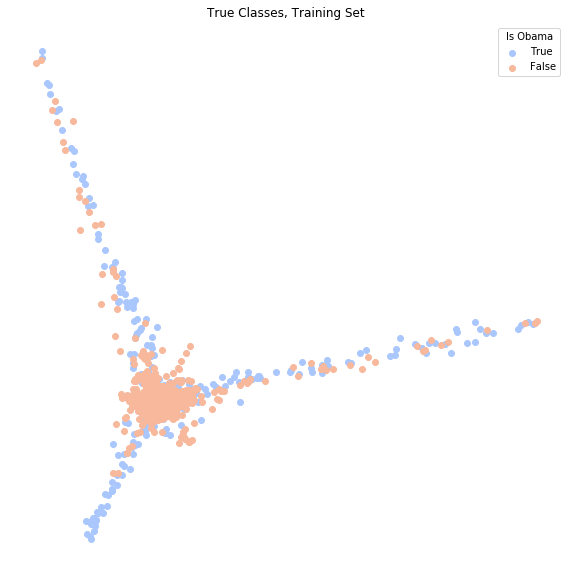

In [86]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

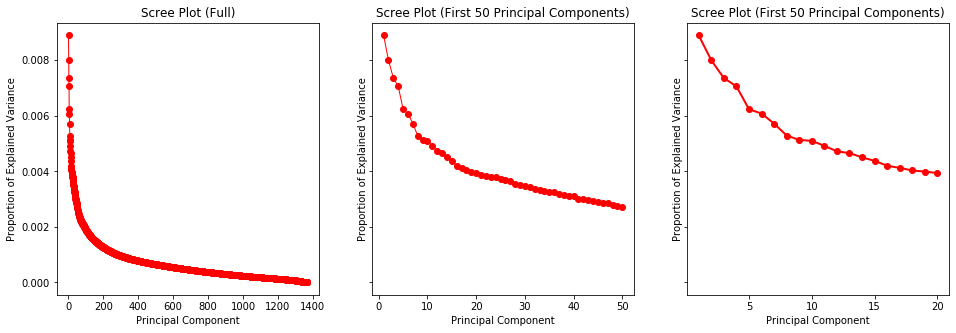

In [87]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [88]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [89]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [90]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6717836257309941

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [91]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6363636363636364

Slightly poorer. How about using more dimensions (40)?

In [92]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7404970760233918
Testing:
0.6774193548387096


Or still more (100)?

In [93]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8194444444444444
Testing:
0.7448680351906158


Or even more (200)!

In [94]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8654970760233918
Testing:
0.7653958944281525


This is becoming ridiculous (400)!

In [95]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9130116959064327
Testing:
0.7976539589442815


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [96]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9627192982456141


Train the model using training data, and then test it on the testing data.

In [97]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8181818181818182


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [98]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [99]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9627192982456141
Testing:
0.8475073313782991


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [100]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [101]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

0.7659574468085106

Recall:

In [102]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

0.8503937007874016

F1-measure:

In [103]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

0.8059701492537313

Let's take a look at how well our posterior distribution looks relative to the truth.

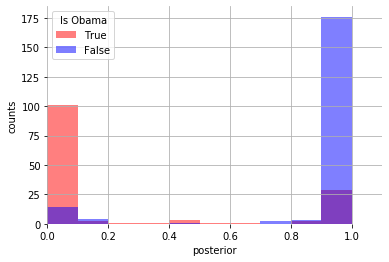

In [104]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [105]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.256292,amy,-1.781288
1,welcomed,-2.280389,5566,-1.802342
2,announcement,-2.330400,dick,-1.813037
3,awarded,-2.330400,brundage,-1.845827
4,fy,-2.343303,monday,-1.914820
5,read,-2.410442,chicago,-2.028148
6,environment,-2.424429,reform,-2.202502
7,ground,-2.424429,political,-2.218502
8,urging,-2.424429,temporary,-2.251292
9,urban,-2.438613,oil,-2.302585


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [106]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [107]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [108]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [109]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [110]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [111]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [112]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [113]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8943702843876958


In [114]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
169,talk.religion.misc,talk.religion.misc
1149,sci.space,sci.space
882,soc.religion.christian,soc.religion.christian
485,soc.religion.christian,soc.religion.christian
1783,comp.graphics,comp.graphics
454,soc.religion.christian,soc.religion.christian
1788,comp.graphics,comp.graphics
853,soc.religion.christian,soc.religion.christian
78,talk.religion.misc,sci.space
1508,sci.space,sci.space


Looks pretty good, lets examine the testing dataset:

In [115]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.7837209302325582


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

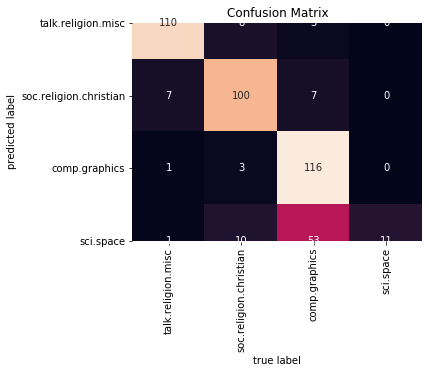

In [116]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [117]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.9045786877341344
0.7837209302325582
0.8227107961232188


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [118]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
talk.religion.misc,0.148837,0.573333,1.000000,0.295504,0.146667
comp.graphics,0.046512,0.939982,0.924370,0.865918,0.909091
sci.space,0.081395,0.905369,0.826446,0.757511,0.877193
soc.religion.christian,0.155814,0.881720,0.648045,0.635746,0.966667


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

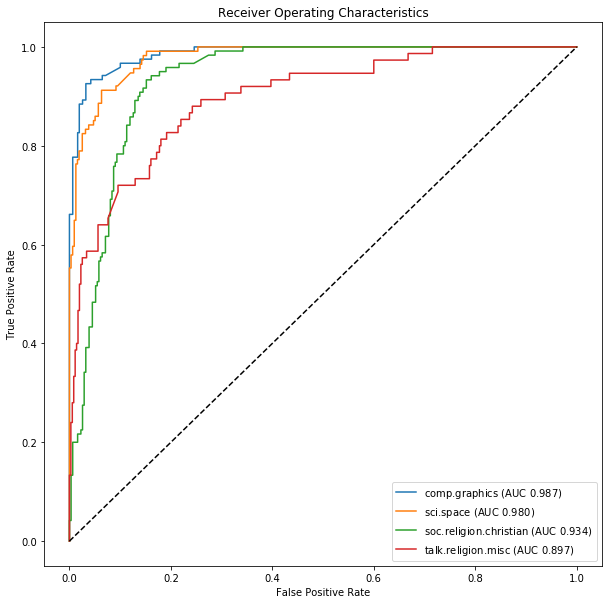

In [119]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

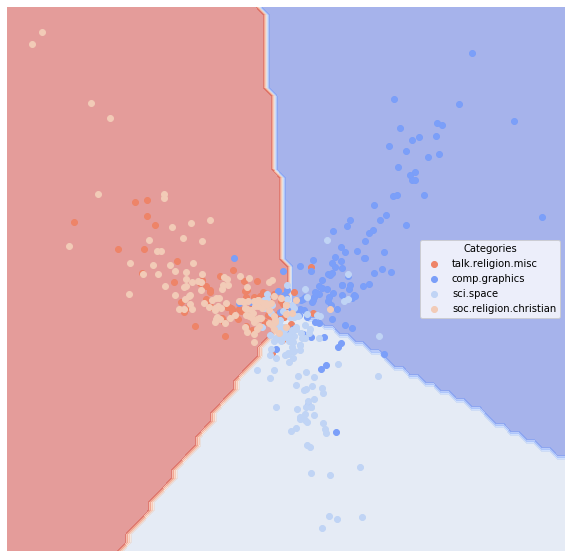

In [120]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


My corpora comes from _Shereen Oraby, Vrindavan Harrison, Lena Reed, Ernesto Hernandez, Ellen Riloff and Marilyn Walker. "Creating and Characterizing a Diverse Corpus of Sarcasm in Dialogue." In The 17th Annual SIGdial Meeting on Discourse and Dialogue (SIGDIAL), Los Angeles, California, USA, 2016._ Since now my project focuses on whether the comment in RateMyProfessor.com contains information about the professors' appearance, I will use a similar corpora, which is a corpora aiming at detecting sarcasm to process the following analysis. Since every text is coded in this corpora, I randomly choose some texts from each category and delete their labels in order to create an uncoded dataset.

### 1. Logistic Regression Model

In [231]:
#Load the coded file and uncoded file
SarcasmL = pandas.read_csv('../week-3/sarcasm-coded.csv')
SarcasmUL = pandas.read_csv('../week-3/sarcasm-uncoded.csv')

In [247]:
#First I need to remove all numerical values in this dataset
import re
for i in range(len(SarcasmL)):
    temp = str(SarcasmL['Text'][i])
    temp = re.sub('\d+','', temp)
    temp = re.sub(r'\[^w]','', temp)
    SarcasmL['Text'][i] = temp

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In this dataset, the column "Label" is a binary variable that has two values "sarc" and "nonsarc" to indicate this dialogue is sarcastic or not. 

In [248]:
#1. Logistic Regression
#First turn categorical variables to binary variables
SarcasmL['category'] = [s == 'sarc' for s in SarcasmL['Label']]
#Tokenize and Normalize
SarcasmL['tokenized_text'] = SarcasmL['Text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
SarcasmL['normalized_text'] = SarcasmL['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
#Split the coded data to train data and test data
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(SarcasmL, holdBackFraction=holdBackFraction)

In [249]:
print(len(train_data_df))
print(len(test_data_df))

4600
1150


In [251]:
#Generate df-idf matrix according to my corpora
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['Text'])

In [252]:
TFVects.shape

(4600, 9648)

In [253]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [254]:
#Dimension reduction and PCA plotting
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


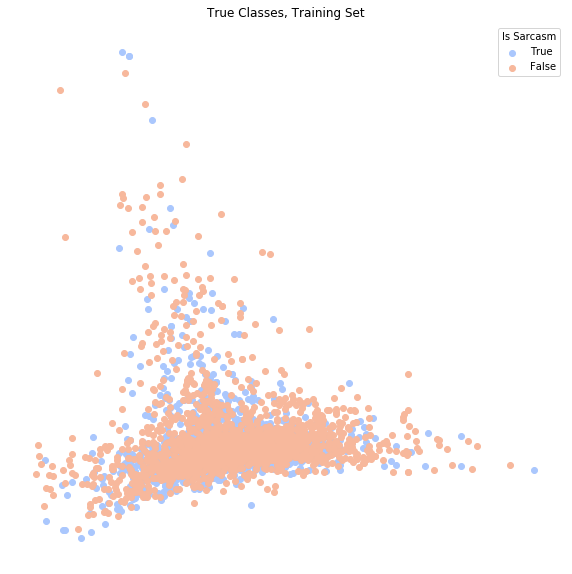

In [256]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Sarcasm')
plt.title('True Classes, Training Set')
plt.show()

It seems that PCA plot captures my corpora well. 

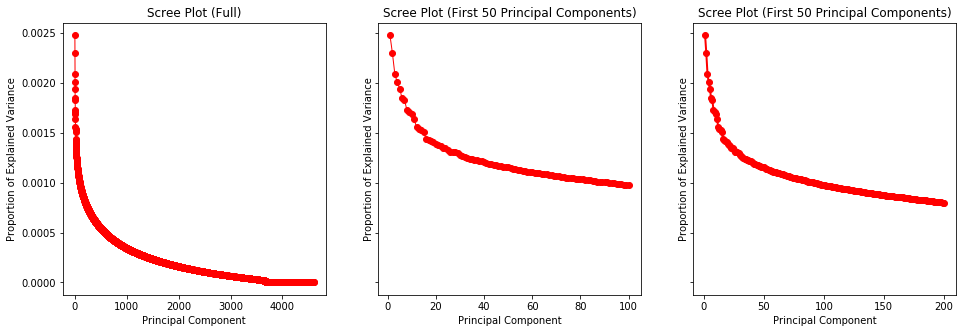

In [259]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(100) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:100], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(200) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:200], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Given the three plots above, it seems that most of the variance in my corpora can be explained by the first 20 components. Therefore, I choose first 20 principal components as my covariates. 

In [261]:
train_data_df['pca_reduced_20'] = train_data_df['pca'].apply(lambda x: x[:20])
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_20'], axis=0), train_data_df['category'])
logistic.score(np.stack(train_data_df['pca_reduced_20'], axis=0), train_data_df['category'])

0.6371739130434783

Logistic Regression's average accuracy on my dataset is only about 64%, which is not a satisfying number. Now I am going to apply this method to test data

In [265]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['Text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_20'] = test_data_df['pca'].apply(lambda x: x[:20])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_20'], axis=0), test_data_df['category'])

0.611304347826087

The score for test dataset is slightly poorer than train dataset, which is just as expected. 

In [271]:
#Get the model retaining only the most individually significant features
#In my case the error said it only accepts 12 penalties
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.8536956521739131


In [278]:
#Now generate calculate its relevant scores
def performaceScores(Model, trainedf, testdf):
    testdf['predict'] = Model.predict(np.stack(testdf['vect'], axis=0))
    testdf['predict_prob_true'] = Model.predict_proba(np.stack(testdf['vect'], axis=0))[:,0]
    
    precision = sklearn.metrics.precision_score(testdf['predict'], testdf['category'])
    print("Precision of the model is: {}:".format(precision))
    recall = sklearn.metrics.recall_score(testdf['predict'], testdf['category'])
    print("Recall of the model is: {}:".format(recall))
    fmeasure = sklearn.metrics.f1_score(testdf['predict'], testdf['category']) 
    print("F-measure of the model is: {}:".format(fmeasure))
    auc = lucem_illud_2020.evaluateClassifier(Model, testdf)
    print('AUC for each category is:')
    print(auc["AUC"])

In [279]:
performaceScores(logistic_l1, train_data_df, test_data_df)

Precision of the model is: 0.4083333333333333:
Recall of the model is: 0.7050359712230215:
F-measure of the model is: 0.5171503957783642:
AUC for each category is:
Category
False    0.642973
True     0.642973
Name: AUC, dtype: float64


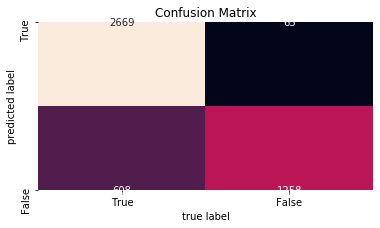

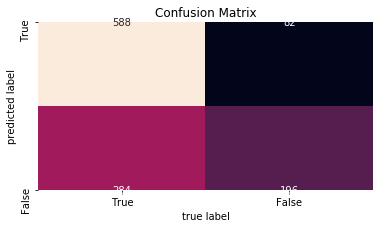

In [280]:
#The confusion matrix for test data and training data
lucem_illud_2020.plotConfusionMatrix(logistic_l1, train_data_df)
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

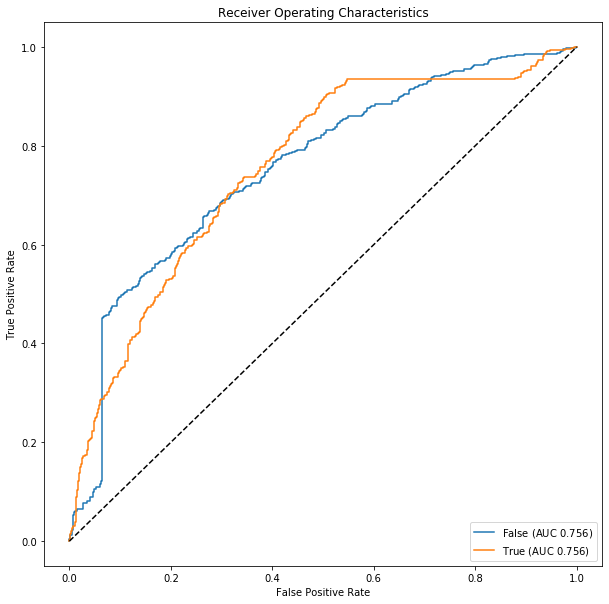

In [283]:
#The ROC curve for logistic regression model
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

Generally speaking, Logistic Regression model does not present a good estimation for my model. The precision rate is below 50%, which is not satisfying at all. 

Now explorate the uncoded data

In [284]:
for i in range(len(SarcasmUL)):
    temp = str(SarcasmUL['Text'][i])
    temp = re.sub('\d+','', temp)
    temp = re.sub(r'\[^w]','', temp)
    SarcasmUL['Text'][i] = temp

In [288]:
#A function to predict uncoded data using a certain method
def uncodedClassification(Model, uncodedDF):
    TFVects_uncoded = TFVectorizer.transform(uncodedDF['Text'])
    uncodedDF['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]
    uncodedDF['predict'] = Model.predict(np.stack(uncodedDF['vect'], axis=0))
    return uncodedDF

In [289]:
uncodedClassification(logistic_l1, SarcasmUL)

,ID,Quote Text,Response Text,Text,vect,predict
0,GEN_sarc_1529,Ok? There has also been a breakout in my high ...,Really? Is it of the flesh eating variety that...,Ok? There has also been a breakout in my high ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
1,GEN_sarc_1530,There is nothing at all absurd about this take...,You forgot about the youth recruitment efforts...,There is nothing at all absurd about this take...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
2,GEN_sarc_1531,"Yeah, I know, the vast majority of the foundin...","No, we don't claim to know the truth. We gladl...","Yeah, I know, the vast majority of the foundin...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,GEN_sarc_1532,Now you've gone and done it...done it...done i...,I've got to concentrate...concentrate...concen...,Now you've gone and done it...done it...done i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
4,GEN_sarc_1533,Yes they are... the fact that most if not all ...,The fact they are blond has nothign to do with...,Yes they are... the fact that most if not all ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
...,...,...,...,...,...,...
515,RQ_notsarc_0106,"you make a great point, one i had brought up t...","it's a pretty obvious counter question, i'm su...","you make a great point, one i had brought up t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
516,RQ_notsarc_0107,Why is the CHOICE of religion more worthy of C...,Well for one thing religion is specificly ment...,Why is the CHOICE of religion more worthy of C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
517,RQ_notsarc_0108,"do you claim this happened by mutation? if so,...","yes, it happened through mutation. what do you...","do you claim this happened by mutation? if so,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
518,RQ_notsarc_0109,we are far from jw's in that we do not deny th...,proving my beliefs from the bible is not being...,we are far from jw's in that we do not deny th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True


### 2. Naive Bayes Model

In [290]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [291]:
performaceScores(naiveBayes, train_data_df, test_data_df)

Precision of the model is: 0.43333333333333335:
Recall of the model is: 0.6520376175548589:
F-measure of the model is: 0.5206508135168961:
AUC for each category is:
Category
False    0.633831
True     0.633831
Name: AUC, dtype: float64


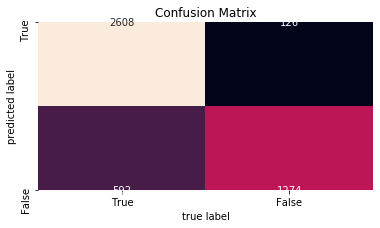

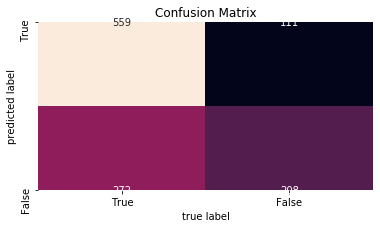

In [292]:
#The confusion matrix for test data and training data
lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_data_df)
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

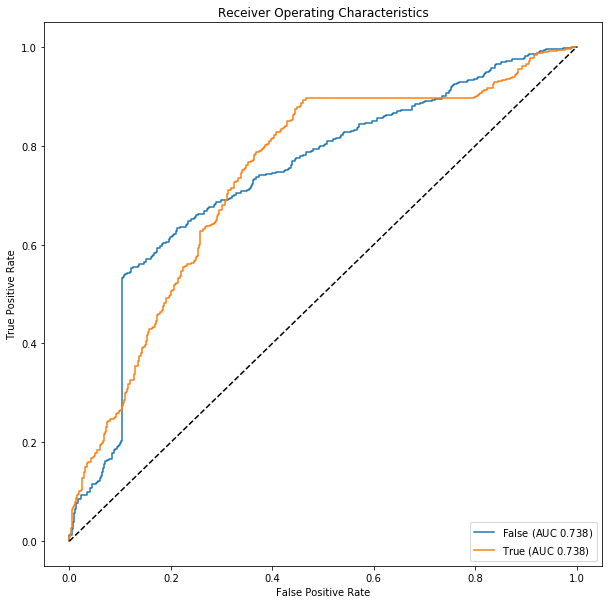

In [293]:
#The ROC curve for logistic regression model
lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

In [294]:
#Now explorate the uncoded data with naive Bayes method
uncodedClassification(naiveBayes, SarcasmUL)

,ID,Quote Text,Response Text,Text,vect,predict
0,GEN_sarc_1529,Ok? There has also been a breakout in my high ...,Really? Is it of the flesh eating variety that...,Ok? There has also been a breakout in my high ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
1,GEN_sarc_1530,There is nothing at all absurd about this take...,You forgot about the youth recruitment efforts...,There is nothing at all absurd about this take...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
2,GEN_sarc_1531,"Yeah, I know, the vast majority of the foundin...","No, we don't claim to know the truth. We gladl...","Yeah, I know, the vast majority of the foundin...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,GEN_sarc_1532,Now you've gone and done it...done it...done i...,I've got to concentrate...concentrate...concen...,Now you've gone and done it...done it...done i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
4,GEN_sarc_1533,Yes they are... the fact that most if not all ...,The fact they are blond has nothign to do with...,Yes they are... the fact that most if not all ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
...,...,...,...,...,...,...
515,RQ_notsarc_0106,"you make a great point, one i had brought up t...","it's a pretty obvious counter question, i'm su...","you make a great point, one i had brought up t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
516,RQ_notsarc_0107,Why is the CHOICE of religion more worthy of C...,Well for one thing religion is specificly ment...,Why is the CHOICE of religion more worthy of C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
517,RQ_notsarc_0108,"do you claim this happened by mutation? if so,...","yes, it happened through mutation. what do you...","do you claim this happened by mutation? if so,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
518,RQ_notsarc_0109,we are far from jw's in that we do not deny th...,proving my beliefs from the bible is not being...,we are far from jw's in that we do not deny th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True


**Summary for Exercise 2** <br>
Generally speaking, Naive Bayes method performs slightly better than simple logistic regression model, with larger precison and F-measure but smaller recall rate. Also, given the two dataframes generated from these two methods, we can see that they are giving out different classification estimation to the same Text. 

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

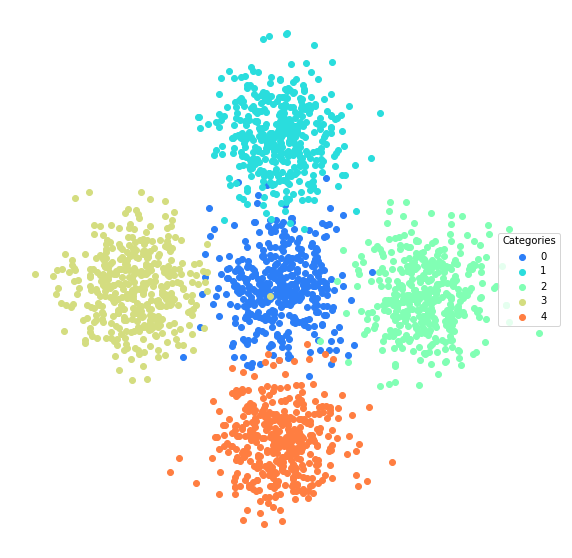

In [204]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [205]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

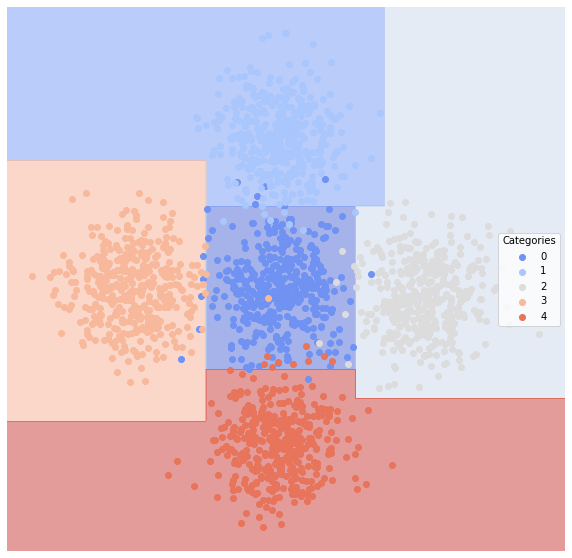

In [206]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [207]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.022,0.964905,0.934066,0.892173,0.944444
1,0.010,0.981900,0.978947,0.954355,0.968750
2,0.004,0.993972,0.990476,0.983043,0.990476
3,0.006,0.992500,0.980198,0.972396,0.990000
4,0.006,0.989547,0.990741,0.976562,0.981651


Lets look at accuracy:

In [208]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.976

What happens if we trim the tree?

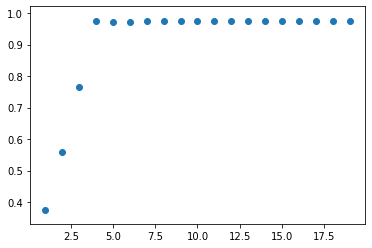

In [209]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [210]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [211]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

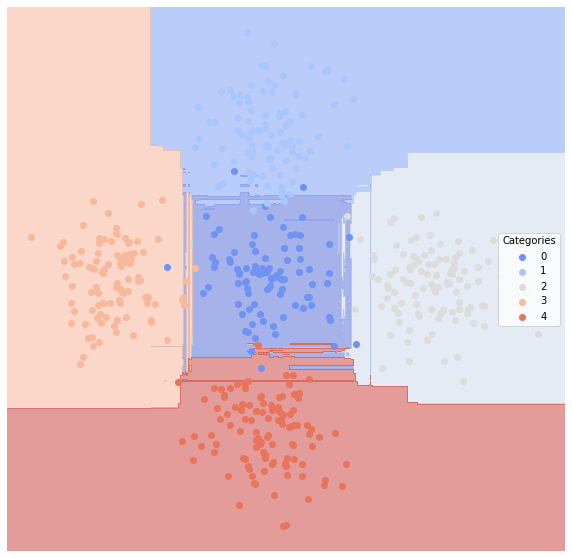

In [212]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [213]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.026,0.958130,0.923077,0.873538,0.933333
1,0.008,0.987108,0.979167,0.962767,0.979167
2,0.004,0.993972,0.990476,0.983043,0.990476
3,0.010,0.982500,0.979798,0.956404,0.970000
4,0.008,0.988268,0.981651,0.967639,0.981651


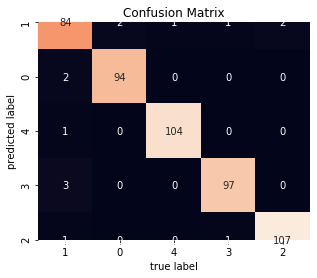

In [214]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

### 1. Decision Tree

In [333]:
sarcasm_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
sarcasm_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [334]:
lucem_illud_2020.evaluateClassifier(sarcasm_tree, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.373913,0.54397,0.616820,0.616352,0.979151
True,0.373913,0.54397,0.780769,0.446461,0.108789


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


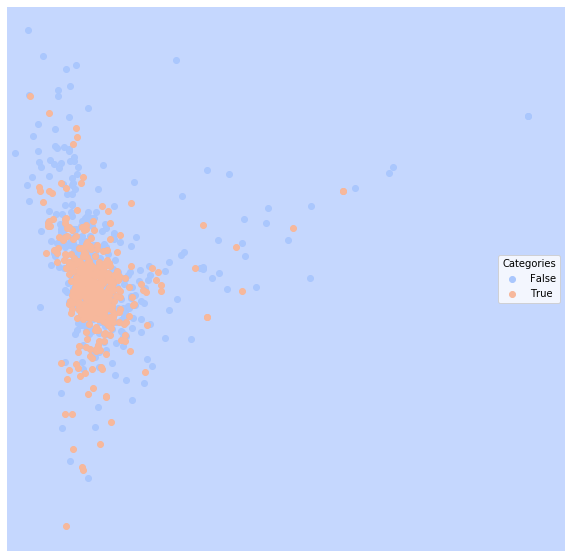

In [335]:
lucem_illud_2020.plotregions(sarcasm_tree, test_data_df)

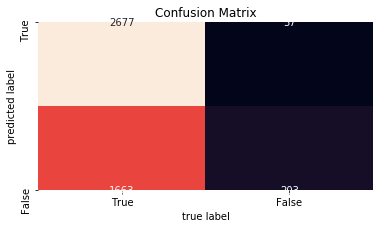

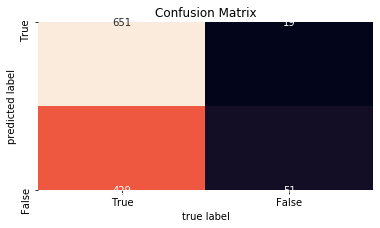

In [337]:
lucem_illud_2020.plotConfusionMatrix(sarcasm_tree, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sarcasm_tree, test_data_df)

It seems that Decision tree method predicts my data in non-sarcasm category badly, and even worse than logistic regression model and simple bayes.

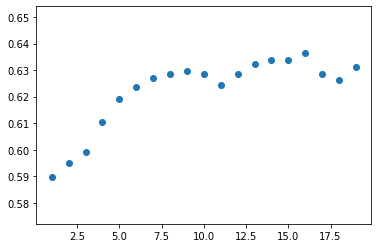

In [312]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(test_data_df['category'], tree2.predict(np.stack(test_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

It seems that the accuracy level of decision tree model on my dataset will not increase much when the depth reaches about 8 degrees. 

In [313]:
#Now explorate the uncoded data with naive Bayes method
uncodedClassification(sarcasm_tree, SarcasmUL)

,ID,Quote Text,Response Text,Text,vect,predict
0,GEN_sarc_1529,Ok? There has also been a breakout in my high ...,Really? Is it of the flesh eating variety that...,Ok? There has also been a breakout in my high ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
1,GEN_sarc_1530,There is nothing at all absurd about this take...,You forgot about the youth recruitment efforts...,There is nothing at all absurd about this take...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
2,GEN_sarc_1531,"Yeah, I know, the vast majority of the foundin...","No, we don't claim to know the truth. We gladl...","Yeah, I know, the vast majority of the foundin...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
3,GEN_sarc_1532,Now you've gone and done it...done it...done i...,I've got to concentrate...concentrate...concen...,Now you've gone and done it...done it...done i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
4,GEN_sarc_1533,Yes they are... the fact that most if not all ...,The fact they are blond has nothign to do with...,Yes they are... the fact that most if not all ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
...,...,...,...,...,...,...
515,RQ_notsarc_0106,"you make a great point, one i had brought up t...","it's a pretty obvious counter question, i'm su...","you make a great point, one i had brought up t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
516,RQ_notsarc_0107,Why is the CHOICE of religion more worthy of C...,Well for one thing religion is specificly ment...,Why is the CHOICE of religion more worthy of C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
517,RQ_notsarc_0108,"do you claim this happened by mutation? if so,...","yes, it happened through mutation. what do you...","do you claim this happened by mutation? if so,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
518,RQ_notsarc_0109,we are far from jw's in that we do not deny th...,proving my beliefs from the bible is not being...,we are far from jw's in that we do not deny th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False


### 2. Random Forest

In [324]:
sarcasm_tree = sklearn.tree.DecisionTreeClassifier(max_depth=8) #Create an instance of our decision tree classifier.
sarcasm_bag = sklearn.ensemble.BaggingClassifier(sarcasm_tree, n_estimators=30, max_samples=0.8, random_state=1) 

In [325]:
sarcasm_bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


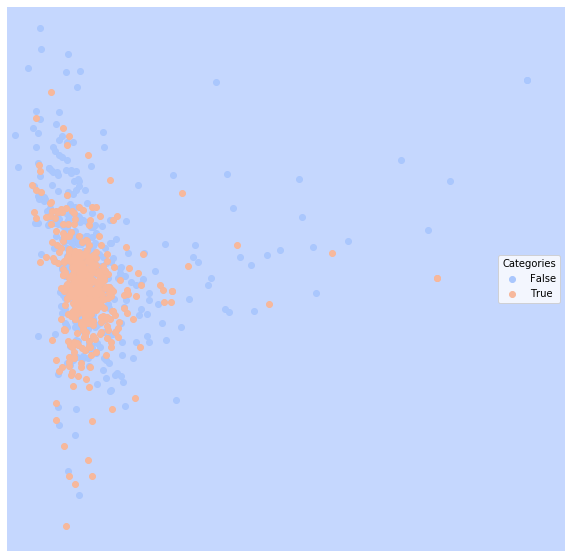

In [326]:
lucem_illud_2020.plotregions(sarcasm_bag, test_data_df)

In [328]:
lucem_illud_2020.evaluateClassifier(sarcasm_bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.366957,0.568688,0.619691,0.618141,0.958209
True,0.366957,0.568688,0.754386,0.477770,0.179167


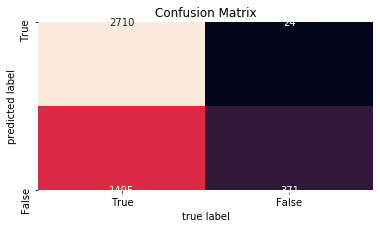

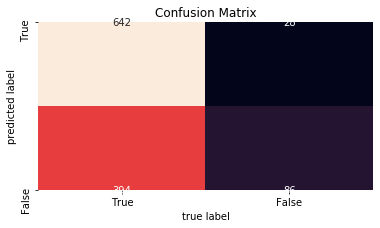

In [330]:
lucem_illud_2020.plotConfusionMatrix(sarcasm_bag, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sarcasm_bag, test_data_df)

In [331]:
#Now explorate the uncoded data with naive Bayes method
uncodedClassification(sarcasm_bag, SarcasmUL)

,ID,Quote Text,Response Text,Text,vect,predict
0,GEN_sarc_1529,Ok? There has also been a breakout in my high ...,Really? Is it of the flesh eating variety that...,Ok? There has also been a breakout in my high ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
1,GEN_sarc_1530,There is nothing at all absurd about this take...,You forgot about the youth recruitment efforts...,There is nothing at all absurd about this take...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
2,GEN_sarc_1531,"Yeah, I know, the vast majority of the foundin...","No, we don't claim to know the truth. We gladl...","Yeah, I know, the vast majority of the foundin...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
3,GEN_sarc_1532,Now you've gone and done it...done it...done i...,I've got to concentrate...concentrate...concen...,Now you've gone and done it...done it...done i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
4,GEN_sarc_1533,Yes they are... the fact that most if not all ...,The fact they are blond has nothign to do with...,Yes they are... the fact that most if not all ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
...,...,...,...,...,...,...
515,RQ_notsarc_0106,"you make a great point, one i had brought up t...","it's a pretty obvious counter question, i'm su...","you make a great point, one i had brought up t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
516,RQ_notsarc_0107,Why is the CHOICE of religion more worthy of C...,Well for one thing religion is specificly ment...,Why is the CHOICE of religion more worthy of C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
517,RQ_notsarc_0108,"do you claim this happened by mutation? if so,...","yes, it happened through mutation. what do you...","do you claim this happened by mutation? if so,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
518,RQ_notsarc_0109,we are far from jw's in that we do not deny th...,proving my beliefs from the bible is not being...,we are far from jw's in that we do not deny th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True


**Summary** <br>
It seems that my dataset does not suit tree models. The performace scores that I get from decision tree model and random forest method are not a lot better than naive Bayes method as well as simple logistic classification. 

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [296]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, better..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[m, sorry, read, commandment]"


Make a testing and training set:

In [297]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [298]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [299]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [300]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [301]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
talk.religion.misc,0.217063,0.568120,0.342857,0.217119,0.233766
comp.graphics,0.397562,0.592614,0.351531,0.315791,0.571429
sci.space,0.350551,0.653924,0.413702,0.366916,0.663848
soc.religion.christian,0.276843,0.503125,1.000000,0.283093,0.006250


And lets look at the testing data

In [303]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.29534883720930233


Let's produce another confusion matrix:

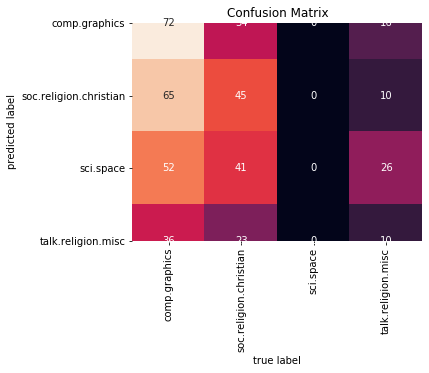

In [304]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [339]:
n_neighbors = 15
weights="uniform"
sarcasm_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

sarcasm_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


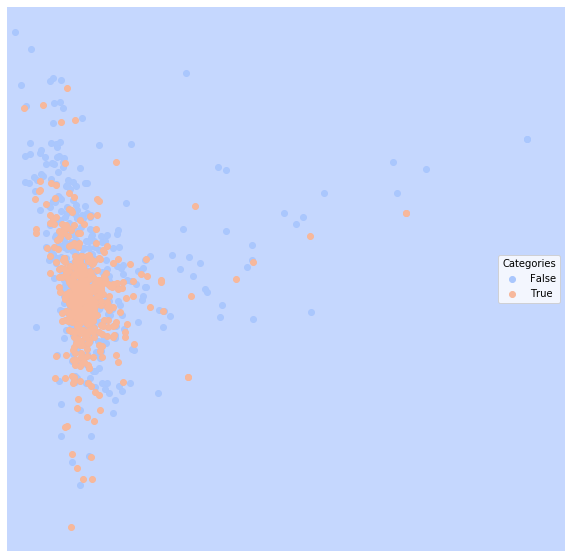

In [340]:
lucem_illud_2020.plotregions(sarcasm_knearest, test_data_df)

In [343]:
lucem_illud_2020.evaluateClassifier(sarcasm_knearest, test_data_df)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.417391,0.5,0.582609,0.582609,1.0
True,0.417391,0.5,0.000000,0.417391,0.0


In [345]:
sklearn.metrics.accuracy_score(test_data_df['category'], sarcasm_knearest.predict(np.stack(test_data_df['vect'], axis = 0)))

0.5826086956521739

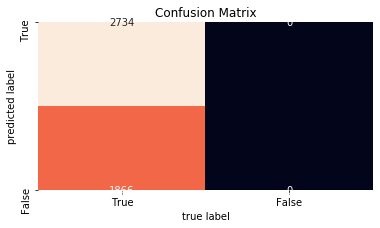

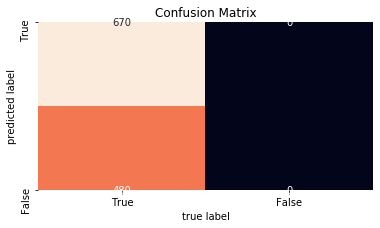

In [346]:
#Plot confusion matrixs
lucem_illud_2020.plotConfusionMatrix(sarcasm_knearest, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sarcasm_knearest, test_data_df)

In [347]:
#Now explorate the uncoded data with naive Bayes method
uncodedClassification(sarcasm_knearest, SarcasmUL)

,ID,Quote Text,Response Text,Text,vect,predict
0,GEN_sarc_1529,Ok? There has also been a breakout in my high ...,Really? Is it of the flesh eating variety that...,Ok? There has also been a breakout in my high ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
1,GEN_sarc_1530,There is nothing at all absurd about this take...,You forgot about the youth recruitment efforts...,There is nothing at all absurd about this take...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
2,GEN_sarc_1531,"Yeah, I know, the vast majority of the foundin...","No, we don't claim to know the truth. We gladl...","Yeah, I know, the vast majority of the foundin...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
3,GEN_sarc_1532,Now you've gone and done it...done it...done i...,I've got to concentrate...concentrate...concen...,Now you've gone and done it...done it...done i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
4,GEN_sarc_1533,Yes they are... the fact that most if not all ...,The fact they are blond has nothign to do with...,Yes they are... the fact that most if not all ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
...,...,...,...,...,...,...
515,RQ_notsarc_0106,"you make a great point, one i had brought up t...","it's a pretty obvious counter question, i'm su...","you make a great point, one i had brought up t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
516,RQ_notsarc_0107,Why is the CHOICE of religion more worthy of C...,Well for one thing religion is specificly ment...,Why is the CHOICE of religion more worthy of C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
517,RQ_notsarc_0108,"do you claim this happened by mutation? if so,...","yes, it happened through mutation. what do you...","do you claim this happened by mutation? if so,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
518,RQ_notsarc_0109,we are far from jw's in that we do not deny th...,proving my beliefs from the bible is not being...,we are far from jw's in that we do not deny th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False


**Summary** <br>
Similar as decision tree models, KNN method also predicts False label badly in my sample. And a warning appears that there is no prediction set (maybe it is because there are some unexpected errors in model setting?). Therefore, if we take this result, we can conclude that KNN is still not the best model to classify my data. 

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [348]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [349]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [350]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [351]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

...and consider the results:

In [352]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.021944,0.968724,0.962025,0.926463,0.950000
Weeaboo Tales: stories about the extreme fans of japanese culture,0.003135,0.993243,1.000000,0.989621,0.986486
Tales From Tech Support,0.015674,0.981712,0.964706,0.948006,0.976190
Bad Roommates: Tales of Irritation,0.021944,0.973078,0.951220,0.925394,0.962963


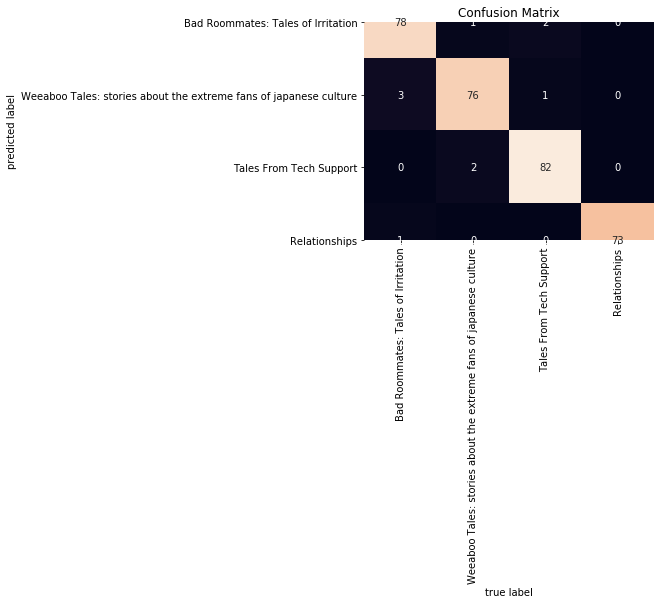

In [353]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

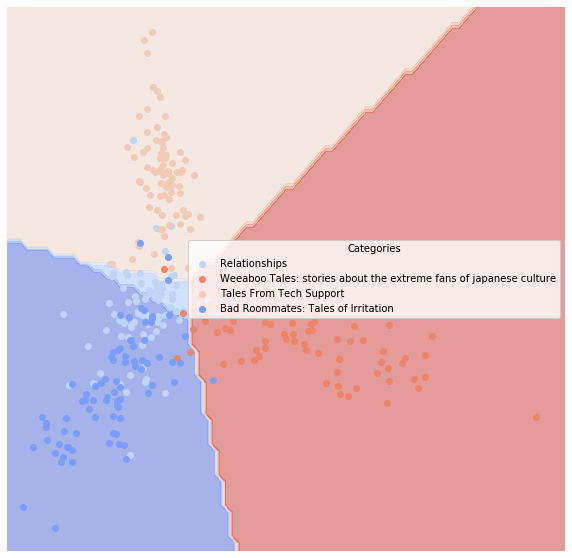

In [354]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [355]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [356]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.028213,0.956224,0.961039,0.907770,0.925000
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.984446,0.986301,0.965914,0.972973
Tales From Tech Support,0.012539,0.983840,0.976190,0.959217,0.976190
Bad Roommates: Tales of Irritation,0.031348,0.966776,0.917647,0.893065,0.962963


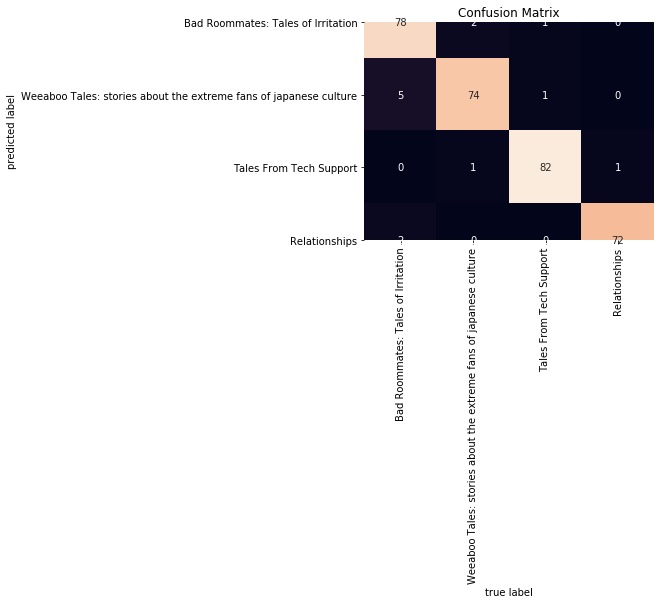

In [357]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

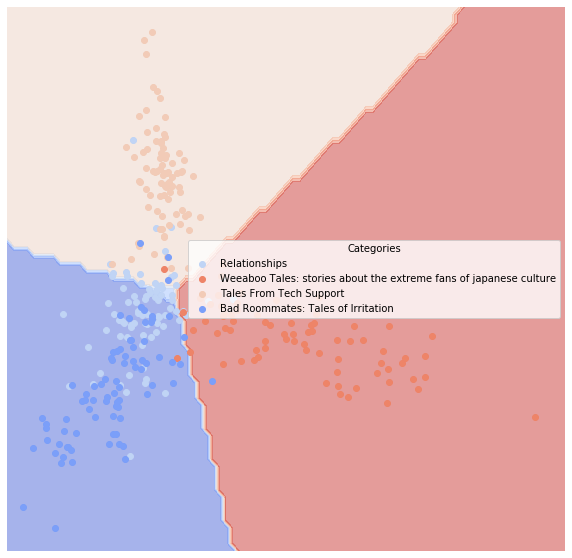

In [358]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [360]:
sarcasm_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
sarcasm_svm.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [361]:
lucem_illud_2020.evaluateClassifier(sarcasm_svm, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.311304,0.663417,0.699488,0.678031,0.816418
True,0.311304,0.663417,0.665761,0.544163,0.510417


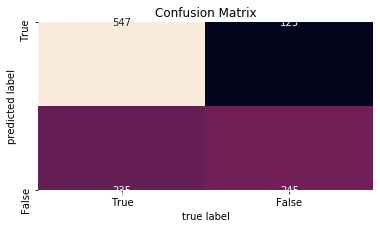

In [362]:
lucem_illud_2020.plotConfusionMatrix(sarcasm_svm, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


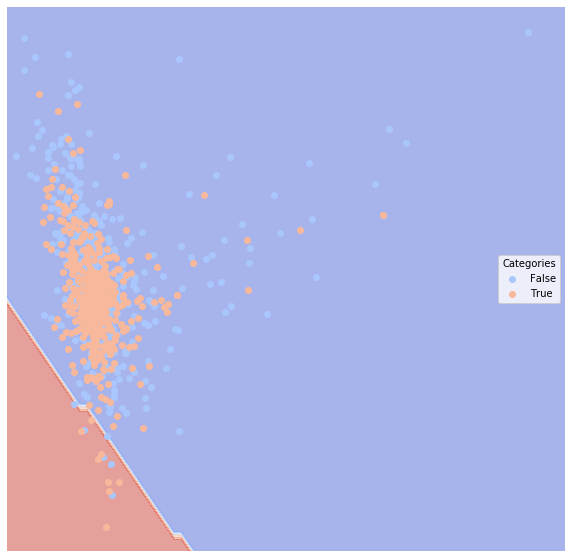

In [364]:
lucem_illud_2020.plotregions(sarcasm_svm, test_data_df)

In [365]:
sklearn.metrics.accuracy_score(test_data_df['category'], sarcasm_svm.predict(np.stack(test_data_df['vect'], axis = 0)))

0.688695652173913

In [366]:
#Now explorate the uncoded data with neural network
uncodedClassification(sarcasm_svm, SarcasmUL)

,ID,Quote Text,Response Text,Text,vect,predict
0,GEN_sarc_1529,Ok? There has also been a breakout in my high ...,Really? Is it of the flesh eating variety that...,Ok? There has also been a breakout in my high ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
1,GEN_sarc_1530,There is nothing at all absurd about this take...,You forgot about the youth recruitment efforts...,There is nothing at all absurd about this take...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
2,GEN_sarc_1531,"Yeah, I know, the vast majority of the foundin...","No, we don't claim to know the truth. We gladl...","Yeah, I know, the vast majority of the foundin...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,GEN_sarc_1532,Now you've gone and done it...done it...done i...,I've got to concentrate...concentrate...concen...,Now you've gone and done it...done it...done i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
4,GEN_sarc_1533,Yes they are... the fact that most if not all ...,The fact they are blond has nothign to do with...,Yes they are... the fact that most if not all ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
...,...,...,...,...,...,...
515,RQ_notsarc_0106,"you make a great point, one i had brought up t...","it's a pretty obvious counter question, i'm su...","you make a great point, one i had brought up t...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
516,RQ_notsarc_0107,Why is the CHOICE of religion more worthy of C...,Well for one thing religion is specificly ment...,Why is the CHOICE of religion more worthy of C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
517,RQ_notsarc_0108,"do you claim this happened by mutation? if so,...","yes, it happened through mutation. what do you...","do you claim this happened by mutation? if so,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
518,RQ_notsarc_0109,we are far from jw's in that we do not deny th...,proving my beliefs from the bible is not being...,we are far from jw's in that we do not deny th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True


**Conclusion** <br>
Considering all methods I applied to classify my model, I think SVM model is the best model, only slightly better than Naive Bayes and logistic regression model. Interestingly, though the latter two models are among the simplest of all models, they have quite good esimates overall. Decision Tree model, Random Forrest model and KNN methods are the worst method in my dataset, some of them even consists of potential setting errors. Therefore, my conclusion is that, if tuned perfectly, simple logistic regression as well as Naive Bayes will be the most efficient model for my classification task.